## Импортирование необходимых библиотек

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [79]:
data = pd.read_csv("/content/drive/MyDrive/data/aichi.csv")
data.head()

,calendar_date,avg_temperature,high_temperature,low_temperature,precipitation,hours_sunlight,solar_radiation,deepest_snowfall,total_snowfall,avg_wind_speed,avg_vapor_pressure,avg_local_pressure,avg_humidity,avg_sea_pressure,cloud_cover
0,2016-01-01,8.1,10.9,4.1,NaN,8.8,NaN,NaN,NaN,4.6,6.1,1027.1,58.0,1028.1,NaN
1,2016-01-02,6.9,12.5,0.7,NaN,8.2,NaN,NaN,NaN,2.0,7.7,1024.4,78.0,1025.3,NaN
2,2016-01-03,8.8,13.6,5.5,NaN,3.3,NaN,NaN,NaN,1.4,9.6,1018.4,86.0,1019.4,NaN
3,2016-01-04,10.7,16.0,4.6,NaN,8.9,NaN,NaN,NaN,2.9,9.8,1016.4,77.0,1017.3,NaN
4,2016-01-05,11.1,13.9,8.7,0.0,4.0,NaN,NaN,NaN,3.9,9.0,1018.8,68.0,1019.7,NaN


In [4]:
data_features = list(zip(
# признаки
[i for i in data.columns],
zip(
    # типы колонок
    [str(i) for i in data.dtypes],
    # проверим есть ли пропущенные значения
    [i for i in data.isnull().sum()]
)))
# Признаки с типом данных и количеством пропусков
data_features

[('calendar_date', ('object', 0)),
 ('avg_temperature', ('float64', 0)),
 ('high_temperature', ('float64', 0)),
 ('low_temperature', ('float64', 0)),
 ('precipitation', ('float64', 238)),
 ('hours_sunlight', ('float64', 0)),
 ('solar_radiation', ('float64', 517)),
 ('deepest_snowfall', ('float64', 517)),
 ('total_snowfall', ('float64', 517)),
 ('avg_wind_speed', ('float64', 0)),
 ('avg_vapor_pressure', ('float64', 3)),
 ('avg_local_pressure', ('float64', 0)),
 ('avg_humidity', ('float64', 3)),
 ('avg_sea_pressure', ('float64', 0)),
 ('cloud_cover', ('float64', 517))]

## Устранение пропусков

In [57]:
# Доля (процент) пропусков
[(c, data[c].isnull().mean()) for c in data.columns]

[('calendar_date', 0.0),
 ('avg_temperature', 0.0),
 ('high_temperature', 0.0),
 ('low_temperature', 0.0),
 ('precipitation', 0.46034816247582205),
 ('hours_sunlight', 0.0),
 ('solar_radiation', 1.0),
 ('deepest_snowfall', 1.0),
 ('total_snowfall', 1.0),
 ('avg_wind_speed', 0.0),
 ('avg_vapor_pressure', 0.005802707930367505),
 ('avg_local_pressure', 0.0),
 ('avg_humidity', 0.0),
 ('avg_sea_pressure', 0.0),
 ('cloud_cover', 1.0)]

In [66]:
# Удаление колонок, содержащих пустые значения
clear_df = data
clear_df = clear_df.dropna(axis=1, how='any')
clear_df.isnull().sum()

calendar_date         0
avg_temperature       0
high_temperature      0
low_temperature       0
hours_sunlight        0
avg_wind_speed        0
avg_local_pressure    0
avg_humidity          0
avg_sea_pressure      0
dtype: int64

In [67]:
# Удаление строк
clear_df = data.dropna(axis=0, how='any')
clear_df.isnull().sum()

calendar_date         0.0
avg_temperature       0.0
high_temperature      0.0
low_temperature       0.0
precipitation         0.0
hours_sunlight        0.0
solar_radiation       0.0
deepest_snowfall      0.0
total_snowfall        0.0
avg_wind_speed        0.0
avg_vapor_pressure    0.0
avg_local_pressure    0.0
avg_humidity          0.0
avg_sea_pressure      0.0
cloud_cover           0.0
dtype: float64

In [80]:
# Заполним пропуски возраста средними значениями
def impute_na(df, variable, value):
    df[variable].fillna(value, inplace=True)
hcols_with_na_temp = ['solar_radiation', 'deepest_snowfall', 'total_snowfall','precipitation','cloud_cover']
data.drop(hcols_with_na_temp, inplace=True, axis=1)
impute_na(data, 'avg_humidity', 0)
impute_na(data, 'avg_vapor_pressure', data['avg_vapor_pressure'].mean())

In [81]:
# Убедимся, что признак avg_humidity не имеет пустых значений
data.isnull().sum()

calendar_date         0
avg_temperature       0
high_temperature      0
low_temperature       0
hours_sunlight        0
avg_wind_speed        0
avg_vapor_pressure    0
avg_local_pressure    0
avg_humidity          0
avg_sea_pressure      0
dtype: int64

## Кодирование категориальных признаков

In [83]:
from sklearn.preprocessing import LabelEncoder

In [101]:
data = pd.read_csv("/content/drive/MyDrive/data/seattle-weather.csv")
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [112]:
# Убедимся что нет пустых значений
data.isnull().sum()

date               0
precipitation      0
temp_max           0
temp_min           0
wind               0
weather            0
wind_log           0
wind_reciprocal    0
wind_sqr           0
wind_exp1          0
wind_exp2          0
wind_exp3          0
wind_boxcox        0
dtype: int64

In [113]:

le = LabelEncoder()
cat_enc_le = le.fit_transform(data['weather'])

In [114]:
data['weather'].unique()

array(['drizzle', 'rain', 'sun', 'snow', 'fog'], dtype=object)

In [115]:
np.unique(cat_enc_le)

array([0, 1, 2, 3, 4])

In [117]:
le.inverse_transform([0, 1, 2, 3, 4])

array(['drizzle', 'fog', 'rain', 'snow', 'sun'], dtype=object)

In [122]:
data['weather'].unique()

array(['drizzle', 'rain', 'sun', 'snow', 'fog'], dtype=object)

In [118]:
pip install category_encoders

     |████████████████████████████████| 86 kB 2.8 MB/s 


In [119]:
#CountEncoder
from category_encoders.count import CountEncoder as ce_CountEncoder

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [127]:
ce_CountEncoder1 = ce_CountEncoder()
data_COUNT_ENC = ce_CountEncoder1.fit_transform(data[data.columns.difference(['wind'])])

In [128]:
data_COUNT_ENC.head()

,date,precipitation,temp_max,temp_min,weather,wind_boxcox,wind_exp1,wind_exp2,wind_exp3,wind_log,wind_reciprocal,wind_sqr
0,1,0.0,12.8,5.0,53,1.956277,2.805855,22.09,1.674205,1.547563,0.212766,2.167948
1,1,10.9,10.6,2.8,641,1.888392,2.725681,20.25,1.650136,1.504077,0.222222,2.121320
2,1,0.8,11.7,7.2,641,0.942893,1.742416,5.29,1.319640,0.832909,0.434783,1.516575
3,1,20.3,12.2,5.6,641,1.956277,2.805855,22.09,1.674205,1.547563,0.212766,2.167948
4,1,1.3,8.9,2.8,641,2.381883,3.338514,37.21,1.826059,1.808289,0.163934,2.469818


In [130]:
data['weather'].unique()

array(['drizzle', 'rain', 'sun', 'snow', 'fog'], dtype=object)

In [131]:
data_COUNT_ENC['weather'].unique()

array([ 53, 641, 640,  26, 101])

In [132]:
ce_CountEncoder2 = ce_CountEncoder(normalize=True)
data_FREQ_ENC = ce_CountEncoder2.fit_transform(data[data.columns.difference(['wind'])])

In [133]:
data_FREQ_ENC['weather'].unique()

array([0.03627652, 0.43874059, 0.43805613, 0.01779603, 0.06913073])

In [134]:
from category_encoders.helmert import HelmertEncoder as ce_HelmertEncoder

In [135]:
#HelmetEncoder
ce_HelmertEncoder1 = ce_HelmertEncoder()
data_HELM_ENC = ce_HelmertEncoder1.fit_transform(data[data.columns.difference(['wind'])], data['wind'])

In [137]:
data_HELM_ENC.head(100)

,intercept,date_0,date_1,date_2,date_3,date_4,date_5,date_6,date_7,date_8,...,weather_1,weather_2,weather_3,wind_boxcox,wind_exp1,wind_exp2,wind_exp3,wind_log,wind_reciprocal,wind_sqr
0,1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,1.956277,2.805855,22.09,1.674205,1.547563,0.212766,2.167948
1,1,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,1.888392,2.725681,20.25,1.650136,1.504077,0.222222,2.121320
2,1,0.0,2.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,0.942893,1.742416,5.29,1.319640,0.832909,0.434783,1.516575
3,1,0.0,0.0,3.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,1.956277,2.805855,22.09,1.674205,1.547563,0.212766,2.167948
4,1,0.0,0.0,0.0,4.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,2.381883,3.338514,37.21,1.826059,1.808289,0.163934,2.469818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,-1.0,0.641225,1.479727,3.24,1.216202,0.587787,0.555556,1.341641
96,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,-1.0,1.102072,1.890814,6.76,1.374631,0.955511,0.384615,1.612452
97,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,-1.0,-1.0,1.818335,2.644310,18.49,1.625343,1.458615,0.232558,2.073644
98,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,-1.0,-1.0,1.745931,2.561666,16.81,1.599768,1.410987,0.243902,2.024846


## Нормализация числовых признаков

In [98]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

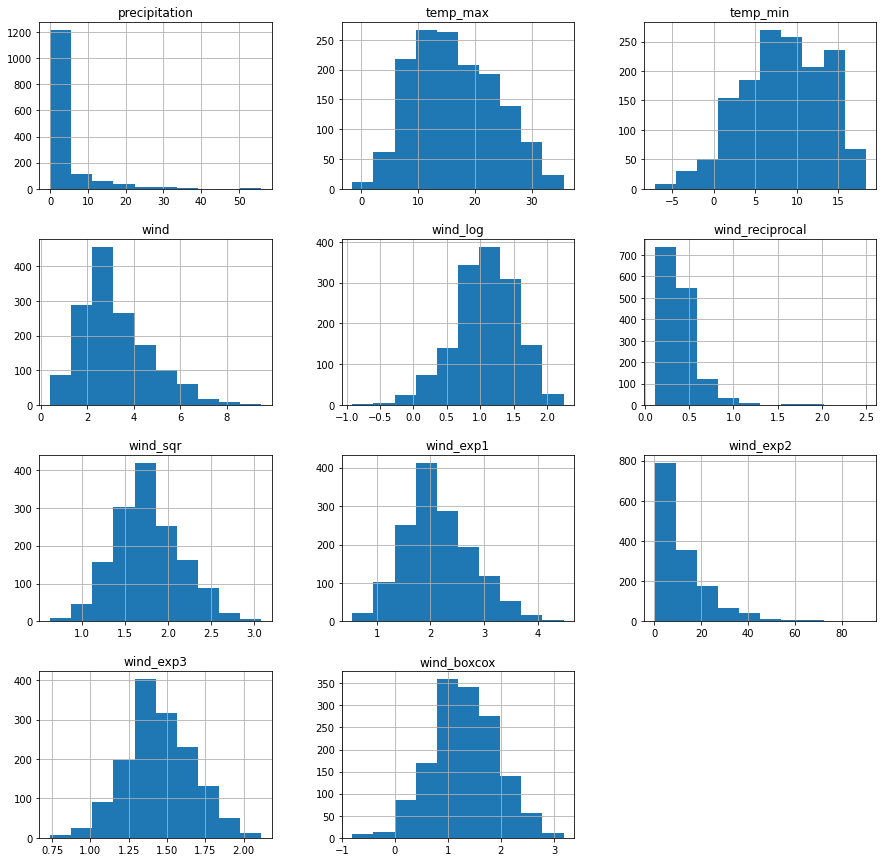

In [138]:
data.hist(figsize=(15,15))
plt.show()

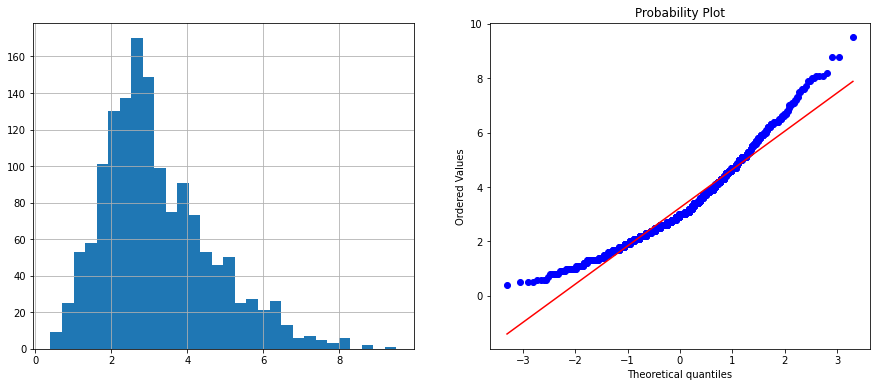

In [103]:
diagnostic_plots(data, 'wind')

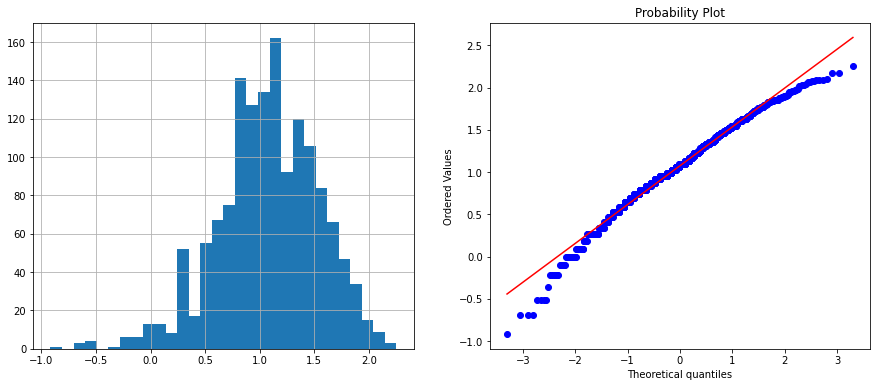

In [104]:
#Логарифмическое преобразование
data['wind_log'] = np.log(data['wind'])
diagnostic_plots(data, 'wind_log')

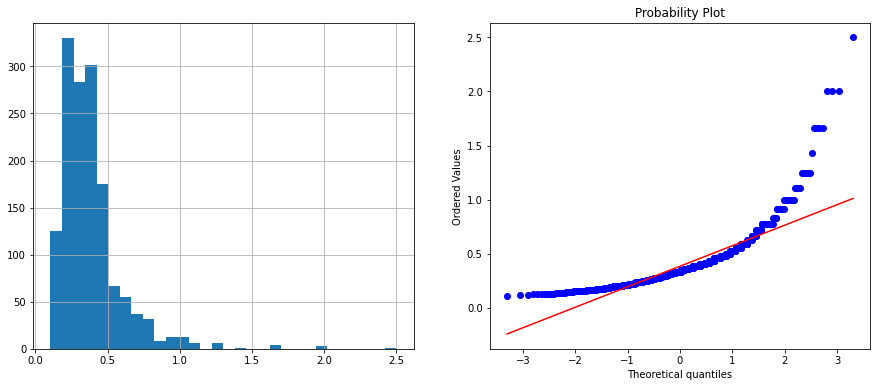

In [105]:
#Обратное преобразование
data['wind_reciprocal'] = 1 / (data['wind']) 
diagnostic_plots(data, 'wind_reciprocal')

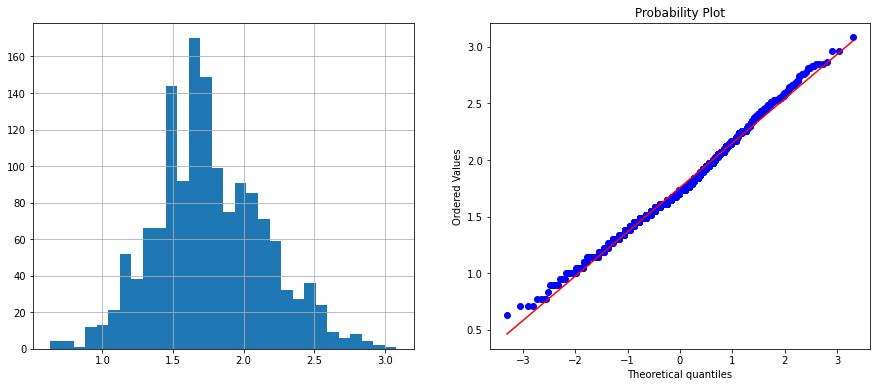

In [106]:
#Квадратный корень
data['wind_sqr'] = data['wind']**(1/2) 
diagnostic_plots(data, 'wind_sqr')

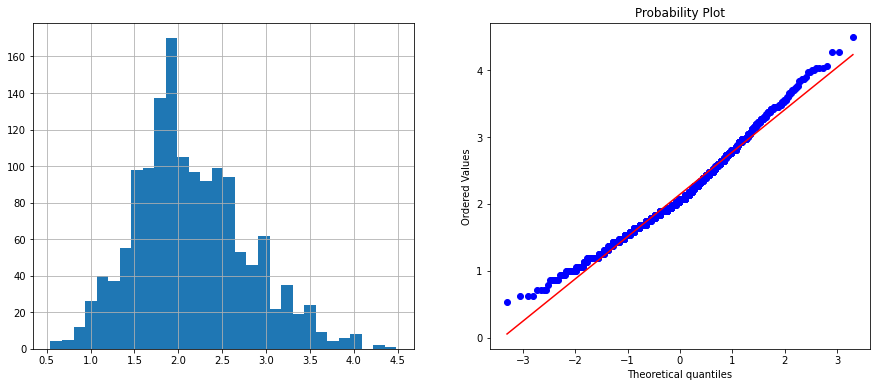

In [107]:
#Возведение в степень
data['wind_exp1'] = data['wind']**(1/1.5)
diagnostic_plots(data, 'wind_exp1')

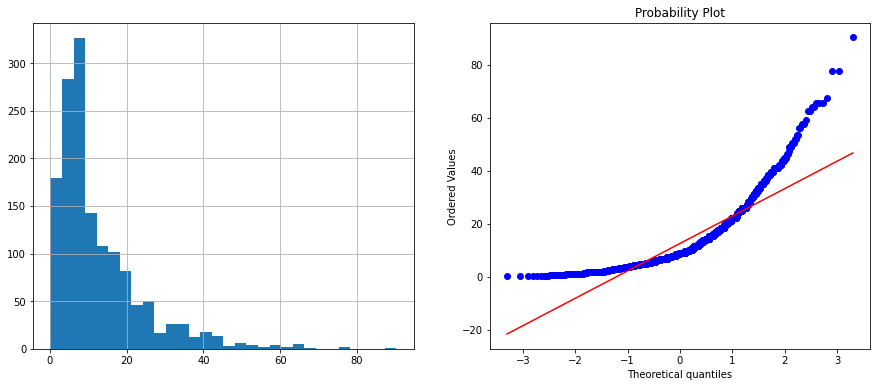

In [109]:
data['wind_exp2'] = data['wind']**(2)
diagnostic_plots(data, 'wind_exp2')

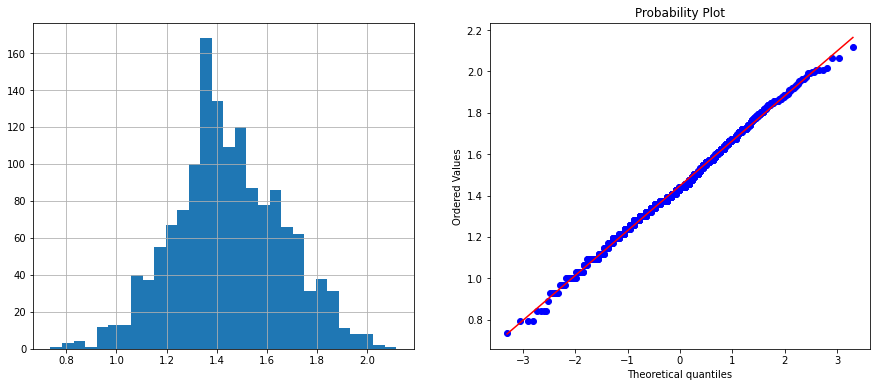

In [110]:
data['wind_exp3'] = data['wind']**(0.333)
diagnostic_plots(data, 'wind_exp3')

Оптимальное значение λ = 0.2919088037899124


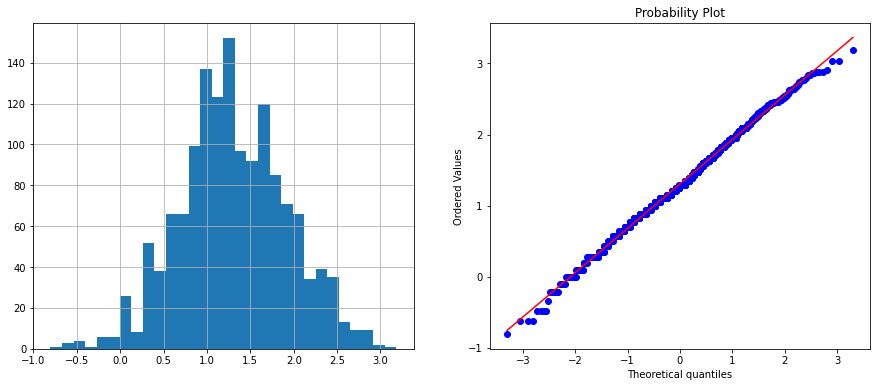

In [111]:
#Преобразованиея Бокса-Кокса
data['wind_boxcox'], param = stats.boxcox(data['wind']) 
print('Оптимальное значение λ = {}'.format(param))
diagnostic_plots(data, 'wind_boxcox')